In [1]:
###########
# Imports #
###########

# importing libraries
import matplotlib.pyplot as plt
import copy

# importing algorithms
# from BFGS_multistart import*
# from Stochastic_local_search import*
# from Cuadratic_opt_v2 import *
# from Scipy_opt_algs import*
# from BO_NpScpy import*
# importing test functions
from test_function import *
from utils import *
from COBYQA import *
from opt_GPyOpt import *

# from ScikitQuant_opt_algs import *
# from pySOT_opt_algs import *
# from CUATRO import *
# from ENTMOOT import *
from TuRBO import *
from CSTR_PID import *

##########################
# Algorithms & Functions #
##########################

home_dir = "images/trajectory_plots_1D_&_tables"

algorithms_test = [
    # LS_QM_v2,
    # opt_SnobFit,
    # opt_SRBF,
    # opt_DYCORS,
    # opt_SOP,
    # opt_COBYLA,
    TuRBO_Optimizer,
    GPyOpt_BO,
    # COBYQA,
    # opt_CUATRO,
    # BO_np_scipy,
    # opt_ENTMOOT,
]

functions_test = ["cstr_pid_f"]


###########################
# Optimization parameters #
###########################

N_x_l = [32]  # Number of input dimensions

start_ = [
    5,
    10,
    15,
]  # starting points on the trajectory of the algorithm on the test function

reps = 2

f_eval_l = [
    20,
    50,
    100,
]  # These are the number of function evaluations (length of trajectory) foreach run in reps. The number depends on the input dimension N_x_l

In [2]:
info, trajectories, timestamp = ML4CE_uncon_eval(
    N_x_l, f_eval_l, functions_test, algorithms_test, reps, home_dir, SafeData=False
)

=====================  cstr_pid_f D32
==  TuRBO_Optimizer
==  GPyOpt_BO


### Benchmark

### Load trajectories

In [3]:
# import pickle

# # Open the file in binary mode for reading
# with open(r'C:\Users\mathi\OneDrive\01_Studium\PhD\Projects\01_Book_Chapter\DDO-4-ChemEng\Benchmarking\01_unconstrained\images\trajectory_plots_1D_&_tables\2024-06-11_18-46-16\trajectories.pkl', 'rb') as file:
#     # Load the object from the file
#     trajectories = pickle.load(file)

# # when loading data make sure to copy the folder name to get the timestamp
# timestamp = '2024-06-11_18-46-16'

### Plot performance tables 

In [4]:
array = ML4CE_uncon_table(
    trajectories, algorithms_test, functions_test, "cstr_pid_f", N_x_l, start_
)

==   TuRBO_Optimizer  ==
==   GPyOpt_BO  ==


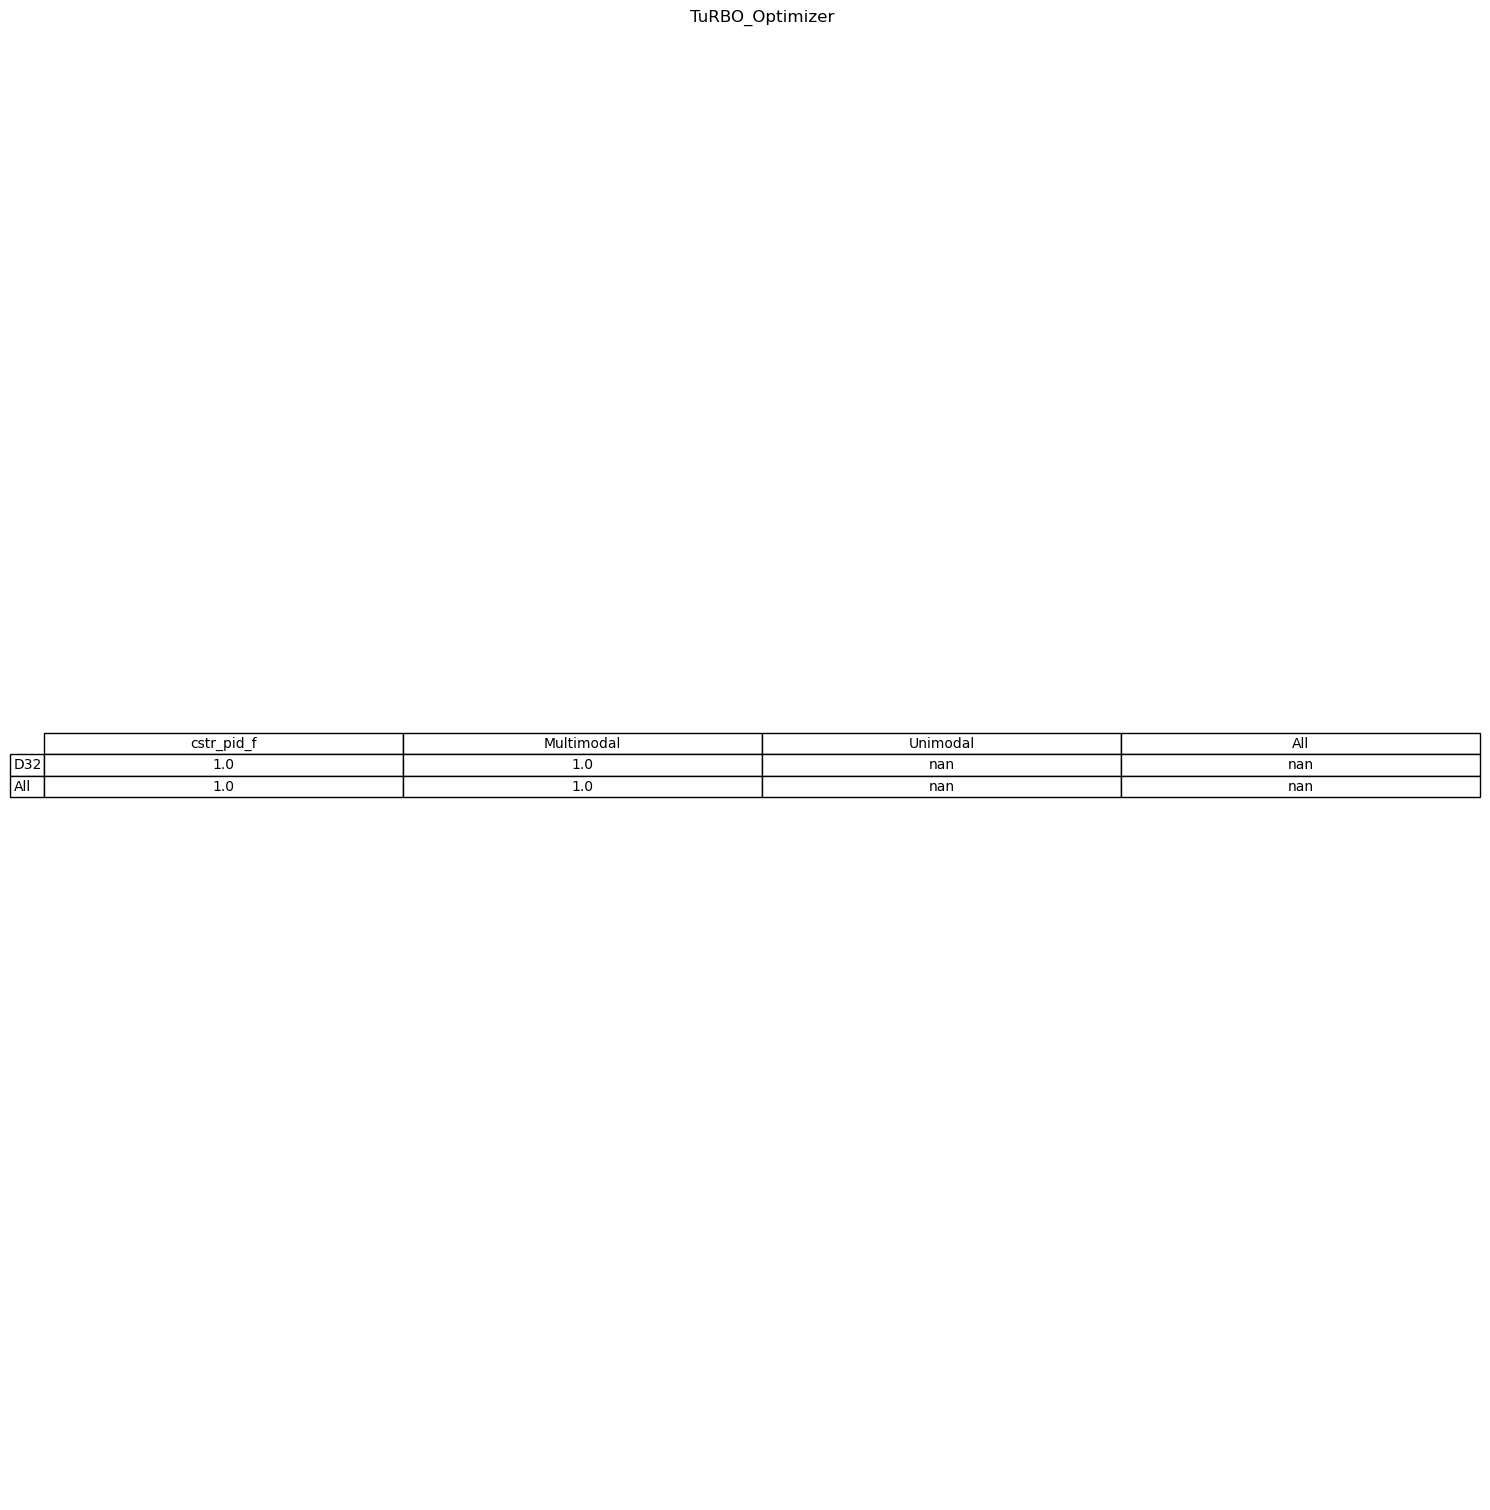

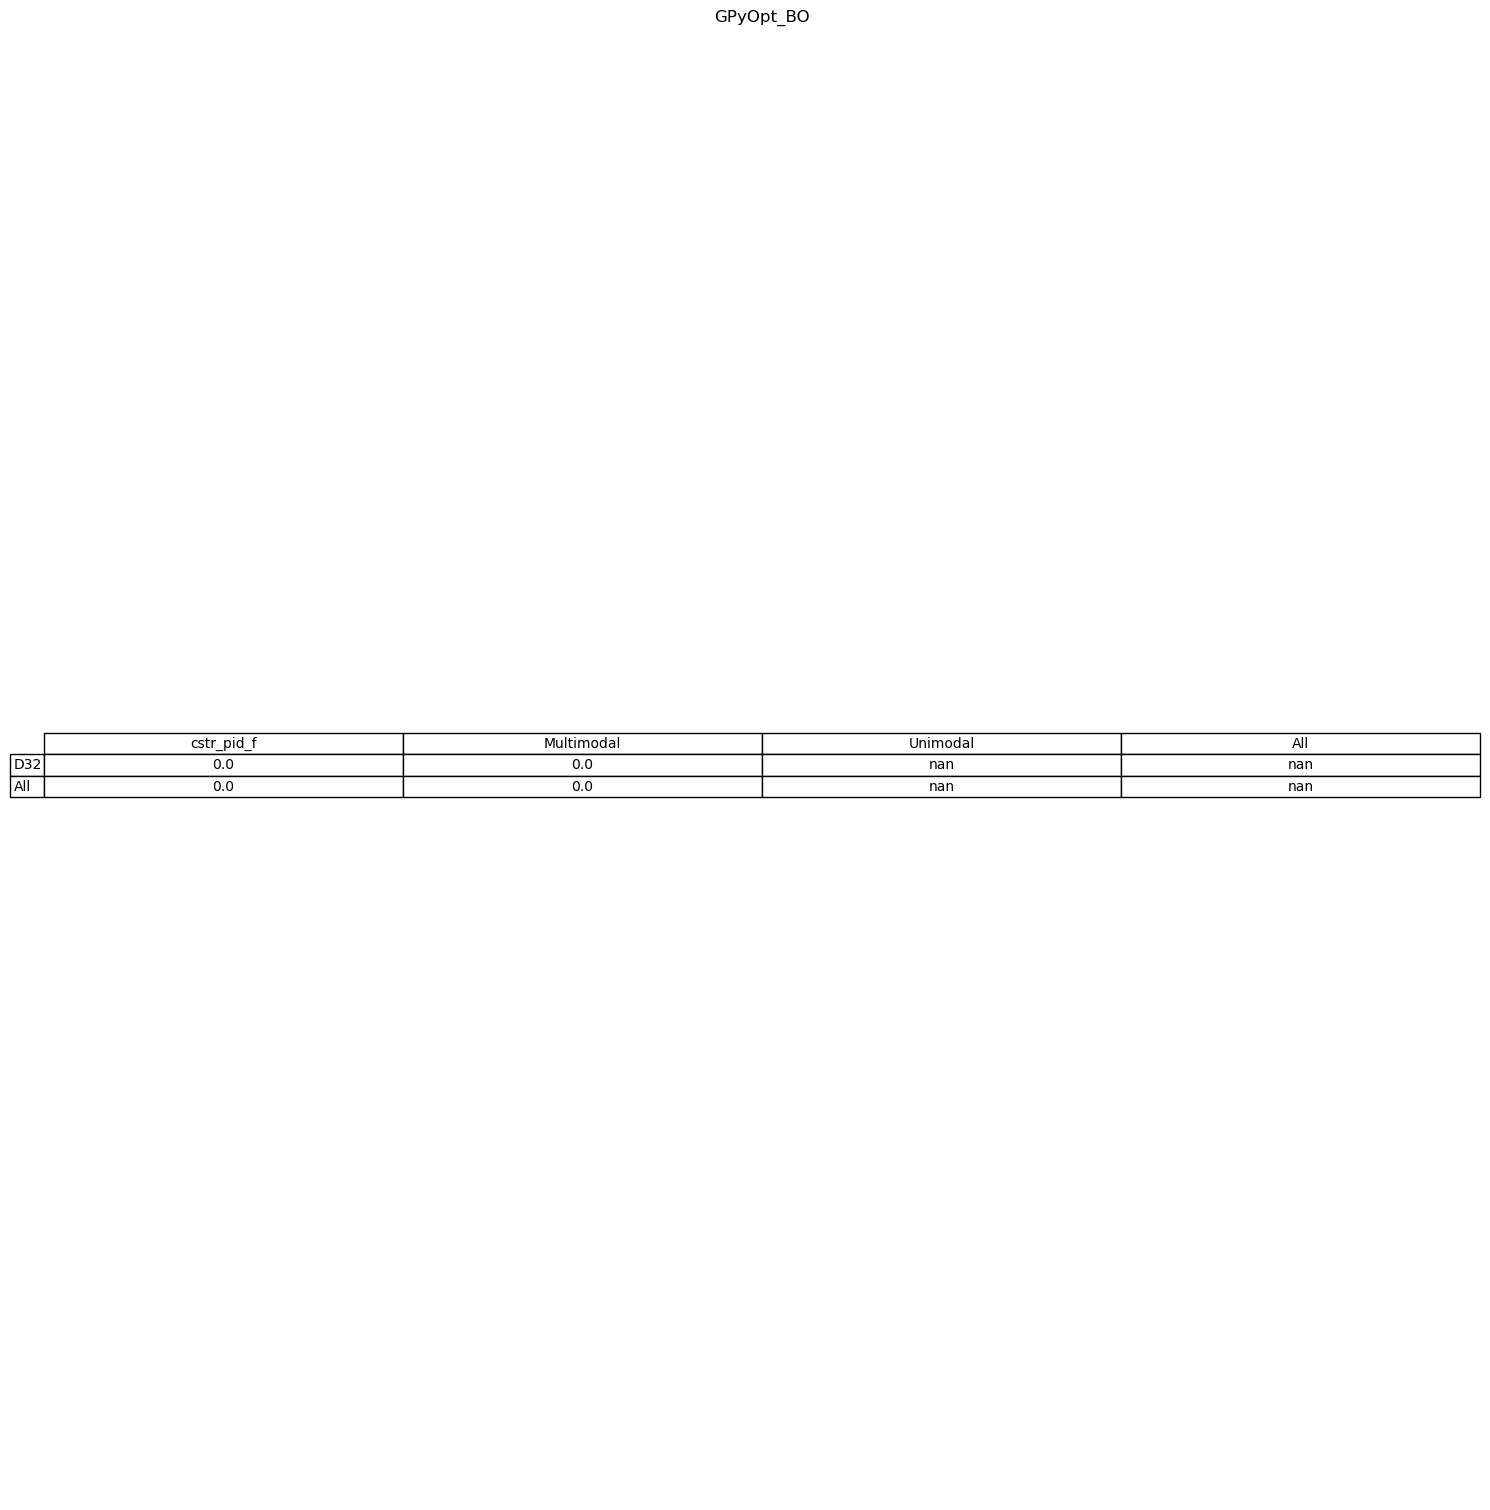

In [5]:
ML4CE_uncon_table_plot(
    array, functions_test, algorithms_test, N_x_l, home_dir, timestamp, SafeFig=False
)

### Plot graphs

ValueError: keyword labelfontfamily is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

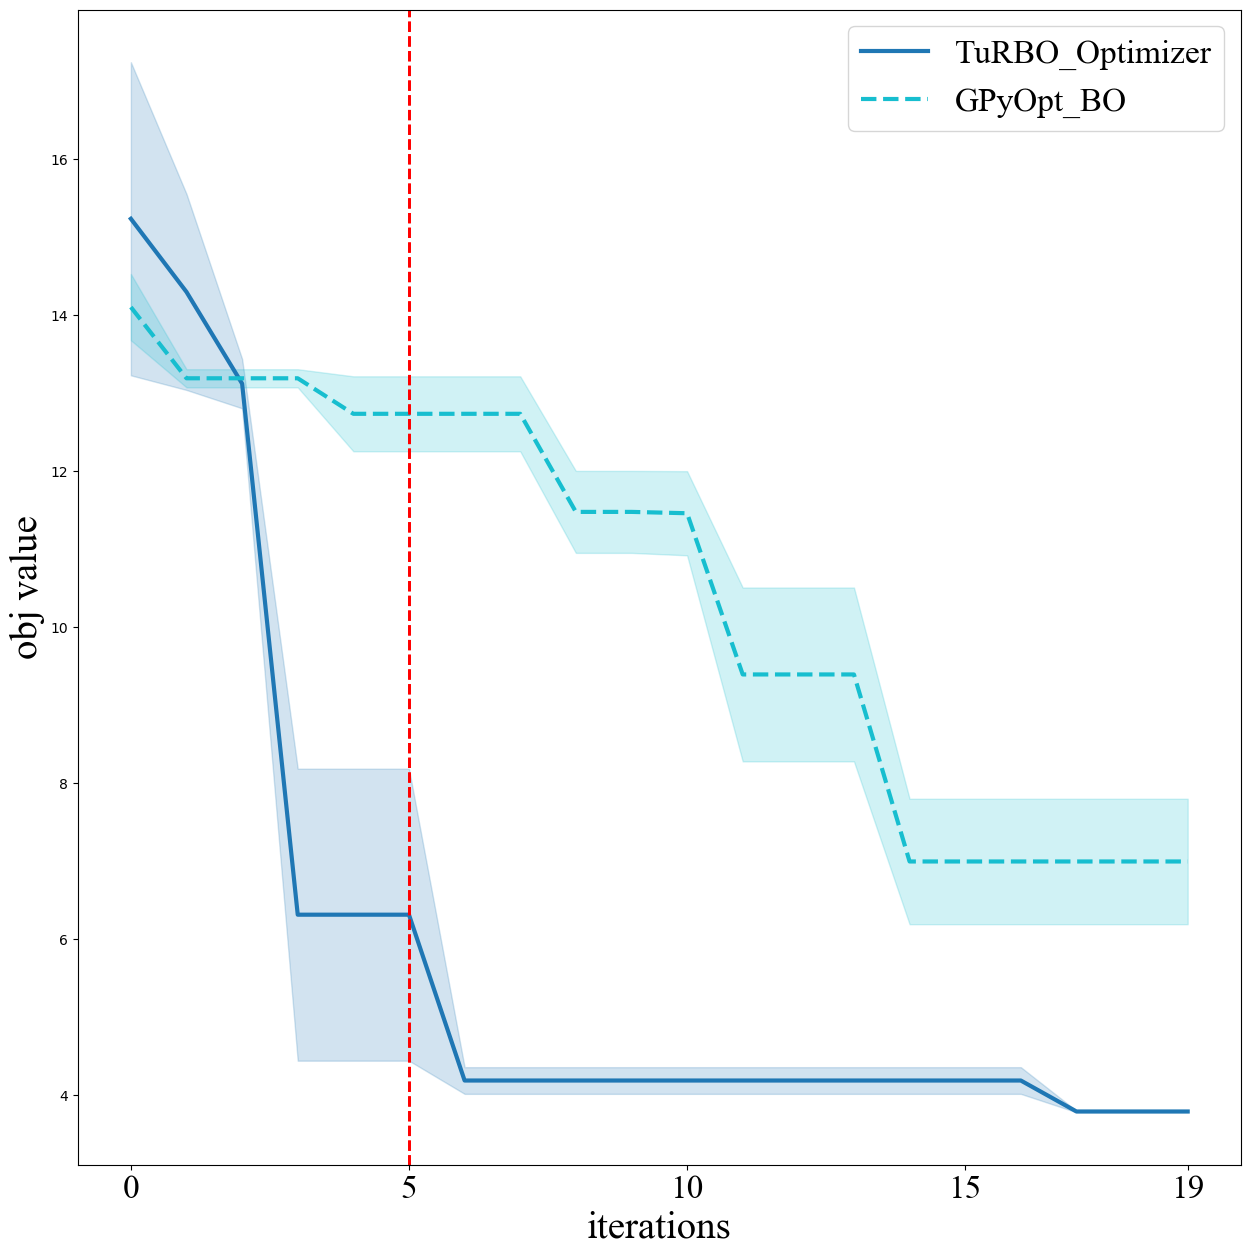

In [6]:
ML4CE_uncon_graph_abs(
    trajectories,
    algorithms_test,
    functions_test,
    N_x_l,
    home_dir,
    timestamp,
    SafeFig=True,
)

In [ ]:
# ML4CE_uncon_graph_rel(trajectories, algorithms_test, functions_test, N_x_l)